In [29]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
%matplotlib inline

# Importing Data file
names = ['Var', 'Skew', 'Kurt', 'Ent', 'Label']
#dataframe = pandas.read_csv("pima-indians-diabetes.data", names=names)
data = pd.read_csv('data_banknote_authentication.txt', names=names)
note_df = pd.DataFrame(data)
note_df.head()

,Var,Skew,Kurt,Ent,Label
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [2]:
note_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Var,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skew,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Kurt,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Ent,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Label,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


In [3]:
note_df.dtypes

Var      float64
Skew     float64
Kurt     float64
Ent      float64
Label      int64
dtype: object

# Check for Null Values

In [5]:
note_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
Var      1372 non-null float64
Skew     1372 non-null float64
Kurt     1372 non-null float64
Ent      1372 non-null float64
Label    1372 non-null int64
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
missing_values=note_df.columns[note_df.isnull().any()]
note_df[missing_values].isnull().sum()

Series([], dtype: float64)

In [9]:
note_df[note_df.isnull().any(axis=1)][missing_values].head()

""


# Outliers

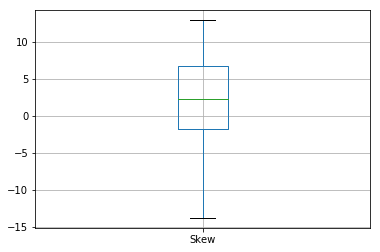

In [22]:
#note_df[['Var']].boxplot()
#note_df[['Skew']].boxplot()
#note_df[['Kurt']].boxplot() #Has Outliers
#note_df[['Ent']].boxplot() #Has Outliers

In [16]:
note_df1 = note_df.copy()
note_df1 = note_df1.mask(note_df1.sub(note_df1.mean()).div(note_df1.std()).abs().gt(2))

In [17]:
print(note_df1.isnull().sum())
print(note_df1.shape[0])

Var      31
Skew     41
Kurt     67
Ent      71
Label     0
dtype: int64
1372


In [18]:
note_df1 = note_df1.apply(lambda x: x.fillna(x.median()),axis=0)

In [19]:
print(note_df1.isnull().sum())
print(note_df1.shape[0])

Var      0
Skew     0
Kurt     0
Ent      0
Label    0
dtype: int64
1372


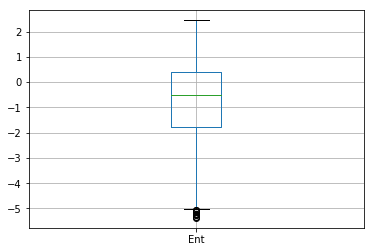

In [26]:
#note_df1[['Var']].boxplot()
#note_df1[['Skew']].boxplot()
#note_df1[['Kurt']].boxplot() #Has Outliers
#note_df1[['Ent']].boxplot() #Has Outliers

In [28]:
note_df1.corr()

,Var,Skew,Kurt,Ent,Label
Var,1.000000,0.243194,-0.235534,0.105274,-0.711711
Skew,0.243194,1.000000,-0.659181,-0.543369,-0.398485
Kurt,-0.235534,-0.659181,1.000000,0.433054,-0.002248
Ent,0.105274,-0.543369,0.433054,1.000000,0.002284
Label,-0.711711,-0.398485,-0.002248,0.002284,1.000000


## Drop the Kurt and Ent columns as they have very little correlation with the Target Variable

In [30]:
note_df2 = note_df1.drop('Kurt', axis=1)
note_df2 = note_df2.drop('Ent', axis=1)

In [31]:
note_df2.head()

,Var,Skew,Label
0,3.62160,8.6661,0
1,4.54590,8.1674,0
2,3.86600,-2.6383,0
3,3.45660,9.5228,0
4,0.32924,-4.4552,0


## Split Test and Train Data

In [32]:
array = note_df2.values
X = array[:,0:2] # select all rows and first 7 columns which are the attributes
Y = array[:,2]   # select all rows and the 8th column which is the classification "Yes", "No" for diabeties
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=test_size, random_state=seed)

## NB Model

In [33]:
model = GaussianNB()
model.fit(X_train, Y_train)
print(model)
# make predictions
expected = Y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85       240
        1.0       0.79      0.78      0.79       172

avg / total       0.82      0.82      0.82       412

[[204  36]
 [ 37 135]]


# SVC Model

In [83]:
from sklearn.cross_validation import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = note_df2["Label"]
features = note_df2.drop(["Label"], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(features,target, test_size = 0.3, random_state = 7)

In [84]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
SVC = SVC(C=.01, kernel='linear', gamma= 1)
SVC = SVC.fit(X_train, Y_train)
# check the accuracy on the training set
print("Accuracy on training set:" ,SVC.score(X_train, Y_train))
prediction = SVC.predict(X_test)
print("Accuracy on test set:", SVC.score(X_test, Y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Accuracy on training set: 0.865625
Accuracy on test set: 0.8398058252427184
Confusion Matrix:
 [[211  37]
 [ 29 135]]


In [85]:
from sklearn.svm import SVC

SVC = SVC(C=.05, kernel='linear', gamma= 1)
SVC = SVC.fit(X_train, Y_train)
# check the accuracy on the training set
print("Accuracy on training set:" ,SVC.score(X_train, Y_train))
prediction = SVC.predict(X_test)
print("Accuracy on test set:", SVC.score(X_test, Y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Accuracy on training set: 0.8666666666666667
Accuracy on test set: 0.837378640776699
Confusion Matrix:
 [[209  36]
 [ 31 136]]


In [86]:
from sklearn.svm import SVC

SVC = SVC(C=1, kernel='linear', gamma= 1)
SVC = SVC.fit(X_train, Y_train)
# check the accuracy on the training set
print("Accuracy on training set:" ,SVC.score(X_train, Y_train))
prediction = SVC.predict(X_test)
print("Accuracy on test set:", SVC.score(X_test, Y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Accuracy on training set: 0.865625
Accuracy on test set: 0.8252427184466019
Confusion Matrix:
 [[204  36]
 [ 36 136]]


In [87]:
#RBF Kernel

from sklearn.svm import SVC

# Building a Support Vector Machine on train data
SVC = SVC(C=.1, kernel='rbf')
SVC = SVC.fit(X_train, Y_train)
# check the accuracy on the training set
print("Train:", SVC.score(X_train, Y_train))
prediction = SVC.predict(X_test)
print("Test:",SVC.score(X_test, Y_test))
print("Confusion Matrix:\n",confusion_matrix(prediction,Y_test))

Train: 0.9208333333333333
Test: 0.9029126213592233
Confusion Matrix:
 [[217  17]
 [ 23 155]]


# SVC is better than NB in all respects
# In SVC RBF kernel yields better results than Linear with 90% accuracy
# In SVC Linear, C=.01 yields best accuracy with 83.9%